In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.utilities import Pareto_split
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from problem_setup import func, y, weighting, n_obj, n_dim

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wfg

In [2]:
M = 2                                   # Number of objectives
kfactor = 1
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params

n_dim = k+l
n_obj = M
func = wfg.WFG6

In [3]:
N = 500
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [4]:
targets = np.array([[1.79, 1.79],[1.79*0.9, 1.79*0.9],[1.79*1.1, 1.79*1.1]])
targets.shape

(3, 2)

In [5]:
targets2 = np.array([[.985, 3.48], [0.985*0.9, 3.48*0.9], [0.985*1.1, 3.48*1.1]])
targets2.shape

(3, 2)

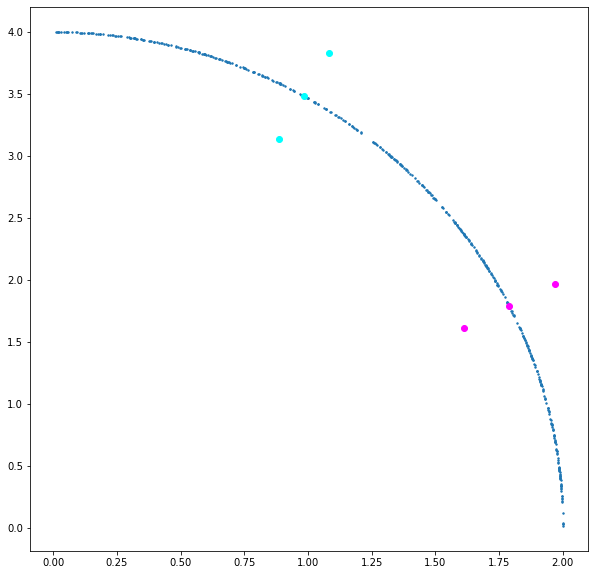

In [6]:
plt.figure(figsize=[10, 10])
plt.scatter(*y.T, s=2)
plt.scatter(*targets.T, c="magenta")
plt.scatter(*targets2.T, c="cyan")

In [6]:
from problem_setup import func, objective_function, limits
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.directed_optimisers import DirectedSaf

In [7]:
multi_surrogate = MultiSurrogate(GP, scaled=True)
budget=20
seed = 0
opt = DirectedSaf(objective_function=objective_function, ei=False,  targets=[[0.5, 4.]], w=0.5, limits=limits, surrogate=multi_surrogate, n_initial=10, budget=budget, seed=seed)

In [8]:
opt.optimise()

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 9.96185006553449
Optimization restart 2/10, f = 14.18938533204673
Optimization restart 3/10, f = 9.961850065535945
Optimization restart 4/10, f = 9.961850065537117
Optimization restart 5/10, f = 9.961850065536447


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 6/10, f = 9.96185006553496
Optimization restart 7/10, f = 9.961850065534353
Optimization restart 8/10, f = 9.961850065534785
Optimization restart 9/10, f = 9.961850065535344
Optimization restart 10/10, f = 9.96185006553491
Optimization restart 1/10, f = 8.198011690460676
Optimization restart 2/10, f = 8.198011690458479
Optimization restart 3/10, f = 8.198011690454972
Optimization restart 4/10, f = 8.198011690458252
Optimization restart 5/10, f = 8.19801169045515
Optimization restart 6/10, f = 8.198011690453846
Optimization restart 7/10, f = 8.19801169045459
Optimization restart 8/10, f = 8.198011690497925
Optimization restart 9/10, f = 8.198011690454814
Optimization restart 10/10, f = 8.19801169045343
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=186860, Sat Mar  6 14:59:21 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.109487743401644e-01 1.0e+00 2.66e-01  2e-01  3e-01 0:00.0
    2     16 -5.311233509485748e

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:23 2021)
final/bestever f-value = -6.426654e-01 -6.426654e-01
incumbent solution: [1.5124549346775662e-15, 3.506421006545622, 2.6504302013178253e-16, 7.230950868422443, 9.999999999999693]
std deviation: [4.1962344262719265e-08, 1.1476575744358367e-06, 2.564765479899507e-07, 2.501984251891328e-06, 2.48691012804481e-06]
Optimization restart 1/10, f = 8.952997796533568
Optimization restart 2/10, f = 8.95299779652447
Optimization restart 3/10, f = 8.952997796541728
Optimization restart 4/10, f = 8.952997796633515
Optimization restart 5/10, f = 8.952997796524297
Optimization restart 6/10, f = 8.952997796524606
Optimization restart 7/10, f = 8.952997796525418
Optimization restart 8/10, f = 8.952997796526702
Optimization restart 9/10, f = 8.952997796530056
Optimization restart 10/10, f = 8.952997796527255


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 7.965884126545622
Optimization restart 2/10, f = 7.965884126546492
Optimization restart 3/10, f = 7.965884126545972
Optimization restart 4/10, f = 7.965884126540408
Optimization restart 5/10, f = 7.965884126541379
Optimization restart 6/10, f = 7.965884126544254
Optimization restart 7/10, f = 7.965884126541883
Optimization restart 8/10, f = 15.608323865254485
Optimization restart 9/10, f = 7.965884126548437
Optimization restart 10/10, f = 7.965884126537613
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=108631, Sat Mar  6 14:59:24 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.693682284817010e-01 1.0e+00 2.46e-01  2e-01  3e-01 0:00.0
    2     16 -5.120677721048372e-01 1.3e+00 2.60e-01  2e-01  3e-01 0:00.0
    3     24 -5.320461940366250e-01 1.4e+00 2.93e-01  3e-01  4e-01 0:00.0
  100    800 -5.682772791937831e-01 4.8e+01 3.02e-03  3e-05  1e-03 0:00.9
  148   1184 -5.682772796947402e-01 8.6e+01 3.72e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:25 2021)
final/bestever f-value = -5.682773e-01 -5.682773e-01
incumbent solution: [9.630744239763568e-16, 3.166823561040786, 1.2189555767113805e-13, 3.9754153633207165, 7.08934294868078]
std deviation: [7.117444045898482e-08, 1.8914448596235702e-06, 4.937317999624135e-07, 3.469670026732629e-06, 5.42067444419283e-06]
Optimization restart 1/10, f = 11.05803453325523
Optimization restart 2/10, f = 11.05803453325513
Optimization restart 3/10, f = 11.058034533255196
Optimization restart 4/10, f = 11.058034533256041
Optimization restart 5/10, f = 11.058034533256503
Optimization restart 6/10, f = 17.027262398456074
Optimization restart 7/10, f = 11.058034533255537
Optimization restart 8/10, f = 11.0580345332893


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 11.058034533437528
Optimization restart 10/10, f = 11.058034533255274
Optimization restart 1/10, f = 6.666210758420782
Optimization restart 2/10, f = 17.027262398456074
Optimization restart 3/10, f = 6.6662107584210695
Optimization restart 4/10, f = 6.666210758414143
Optimization restart 5/10, f = 6.6662107584378525
Optimization restart 6/10, f = 6.6662107584435635
Optimization restart 7/10, f = 6.666210758413898
Optimization restart 8/10, f = 6.666210758402581
Optimization restart 9/10, f = 6.666210758413437
Optimization restart 10/10, f = 6.666210758402556
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=161441, Sat Mar  6 14:59:26 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.370036342733372e-01 1.0e+00 2.91e-01  3e-01  3e-01 0:00.0
    2     16 -5.339134339563265e-01 1.3e+00 3.39e-01  3e-01  4e-01 0:00.0
    3     24 -5.320184984328573e-01 1.4e+00 3.60e-01  3e-01  4e-01 0:00.0
  100    800 -5.7502

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:28 2021)
final/bestever f-value = -5.750255e-01 -5.750255e-01
incumbent solution: [4.7255721470583e-16, 2.3129683976715505, 2.032183012039831, 7.999999999999973, 9.999999999999943]
std deviation: [8.660384825992986e-08, 8.555163251882846e-07, 1.481100546413369e-06, 2.142677414965351e-06, 1.4280083374747908e-06]
Optimization restart 1/10, f = 12.992111624721089
Optimization restart 2/10, f = 12.992111624709516
Optimization restart 3/10, f = 12.992111624709754


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 4/10, f = 12.992111624709398
Optimization restart 5/10, f = 18.446200931660744
Optimization restart 6/10, f = 18.446200931660925
Optimization restart 7/10, f = 86.78028145396787
Optimization restart 8/10, f = 86.78028132292768
Optimization restart 9/10, f = 86.78027272946903
Optimization restart 10/10, f = 18.44620093166091


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 7.930403172885753
Optimization restart 2/10, f = 7.930403172875322
Optimization restart 3/10, f = 7.930403172888334
Optimization restart 4/10, f = 7.930403172873819
Optimization restart 5/10, f = 7.930403172875563
Optimization restart 6/10, f = 7.930403172895524
Optimization restart 7/10, f = 18.446200931660744
Optimization restart 8/10, f = 7.93040317287239
Optimization restart 9/10, f = 7.9304031728812765
Optimization restart 10/10, f = 7.930403172875139
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=183275, Sat Mar  6 14:59:29 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.857847384662219e-01 1.0e+00 2.95e-01  3e-01  3e-01 0:00.0
    2     16 -5.078148853517966e-01 1.3e+00 3.36e-01  3e-01  4e-01 0:00.0
    3     24 -5.157430639972355e-01 1.4e+00 3.84e-01  3e-01  4e-01 0:00.0
  100    800 -5.756540703087940e-01 8.4e+01 8.48e-02  1e-03  6e-02 0:01.0
  200   1600 -5.756735831376329e-01 5.9e+04 1.49e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:32 2021)
final/bestever f-value = -5.756736e-01 -5.756736e-01
incumbent solution: [0.23200689544248165, 3.9999999999974536, 4.276339795814364e-13, 6.98570329178726, 9.99999999999883]
std deviation: [1.5219028147447596e-08, 9.007290358035045e-07, 5.006056133723066e-07, 1.4742182615377555e-06, 1.4486692115340655e-06]
Optimization restart 1/10, f = 13.964141817742986
Optimization restart 2/10, f = 93.45564535494606
Optimization restart 3/10, f = 13.964141817742929
Optimization restart 4/10, f = 13.964141817740915
Optimization restart 5/10, f = 33.399321336943885
Optimization restart 6/10, f = 13.964141817741389
Optimization restart 7/10, f = 13904488.186878406
Optimization restart 8/10, f = 19.86513946486546


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 93.4556877196577
Optimization restart 10/10, f = 13.96414181774101
Optimization restart 1/10, f = 12.11930322406036
Optimization restart 2/10, f = 19.865139464868125
Optimization restart 3/10, f = 12.119303224058491
Optimization restart 4/10, f = 12.11930322407284
Optimization restart 5/10, f = 12.119303224058434
Optimization restart 6/10, f = 12.11930322408703
Optimization restart 7/10, f = 12.119303224058058
Optimization restart 8/10, f = 19.865139464865496
Optimization restart 9/10, f = 12.119303224062607
Optimization restart 10/10, f = 12.119303224212493
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=146768, Sat Mar  6 14:59:33 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.735595708894362e-01 1.0e+00 2.42e-01  2e-01  2e-01 0:00.0
    2     16 -4.961006547141787e-01 1.2e+00 2.89e-01  3e-01  4e-01 0:00.0
    3     24 -4.998194746728854e-01 1.6e+00 3.68e-01  3e-01  5e-01 0:00.0
  100    800 -5.6496

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:34 2021)
final/bestever f-value = -5.649620e-01 -5.649620e-01
incumbent solution: [3.425861728957845e-19, 3.0460329901007794, 7.107373380277597e-16, 6.869701849032827, 9.999999999992847]
std deviation: [1.6268669889189914e-07, 9.641318151788988e-07, 6.158570461638846e-07, 1.9303509292322623e-06, 8.610708819246286e-06]
Optimization restart 1/10, f = 13.587162148211796
Optimization restart 2/10, f = 31.871335308015283
Optimization restart 3/10, f = 13.587162148214297
Optimization restart 4/10, f = 21.284077998070092
Optimization restart 5/10, f = 13.587162148211746
Optimization restart 6/10, f = 21.28407799807013
Optimization restart 7/10, f = 21.284077998070106
Optimization restart 8/10, f = 21.284077998072274
Optimization restart 9/10, f = 21.284077998070174


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 21.28407799807009
Optimization restart 1/10, f = 11.28609630933719
Optimization restart 2/10, f = 11.286096309336568
Optimization restart 3/10, f = 11.286096309336756
Optimization restart 4/10, f = 11.286096309338141
Optimization restart 5/10, f = 21.28407799807009
Optimization restart 6/10, f = 11.286096309336964
Optimization restart 7/10, f = 21.284077998070096
Optimization restart 8/10, f = 21.28407799807043
Optimization restart 9/10, f = 11.286096309365218
Optimization restart 10/10, f = 11.286096309336564
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=174713, Sat Mar  6 14:59:35 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.854435448527085e-01 1.0e+00 2.27e-01  2e-01  2e-01 0:00.0
    2     16 -5.053397143835495e-01 1.2e+00 2.41e-01  2e-01  3e-01 0:00.0
    3     24 -5.274247687452076e-01 1.4e+00 3.06e-01  3e-01  4e-01 0:00.0
  100    800 -5.686015853340975e-01 2.0e+01 4.86e-03  1e-04  2e-03 0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:37 2021)
final/bestever f-value = -5.686016e-01 -5.686016e-01
incumbent solution: [8.076215220513676e-15, 3.8554639443320875, 7.154623194263488e-13, 7.999999999999898, 8.585872801781436]
std deviation: [8.257325145764647e-08, 7.664398961056093e-07, 4.621854015928073e-07, 1.0679380618186532e-06, 1.9982049783087887e-06]
Optimization restart 1/10, f = 12.834200142384596
Optimization restart 2/10, f = 12.834200142374373
Optimization restart 3/10, f = 12.83420014239505
Optimization restart 4/10, f = 12.834200142374257
Optimization restart 5/10, f = 12.834200142374053
Optimization restart 6/10, f = 12.834200142374309
Optimization restart 7/10, f = 22.70294823884685


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 12.834200142374314
Optimization restart 9/10, f = 12.834200142374495
Optimization restart 10/10, f = 22.703016531145106
Optimization restart 1/10, f = 10.838451845408885
Optimization restart 2/10, f = 5467019.298930468
Optimization restart 3/10, f = 22.703016531274763
Optimization restart 4/10, f = 22.7030165312749
Optimization restart 5/10, f = 22.703016531274773
Optimization restart 6/10, f = 10.83845184524723
Optimization restart 7/10, f = 10.838451845247503
Optimization restart 8/10, f = 22.70301653127477
Optimization restart 9/10, f = 10.838451845247457
Optimization restart 10/10, f = 22.703016531274763
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=146247, Sat Mar  6 14:59:38 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.625448137211789e-01 1.0e+00 2.61e-01  2e-01  3e-01 0:00.0
    2     16 -4.706336290653745e-01 1.4e+00 2.97e-01  3e-01  3e-01 0:00.0
    3     24 -5.096446408570332e-01 1.8e+00

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:39 2021)
final/bestever f-value = -5.553544e-01 -5.553544e-01
incumbent solution: [1.8986584479551643e-15, 2.6845251553700824, 2.5418500338260053, 3.8827596823017183, 6.157637068674587]
std deviation: [1.0855761225985933e-07, 1.4586879973782348e-06, 1.6926333330122608e-06, 2.6317193366423987e-06, 3.633742282660981e-06]
Optimization restart 1/10, f = 12.735726192805052
Optimization restart 2/10, f = 12.735726192607155
Optimization restart 3/10, f = 24.12195506447945
Optimization restart 4/10, f = 12.73572619260714
Optimization restart 5/10, f = 12.735726192607114
Optimization restart 6/10, f = 12.73572619260727
Optimization restart 7/10, f = 24.121955064482943
Optimization restart 8/10, f = 12.735726192607238
Optimization restart 9/10, f = 23400309.400338657


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 12.735726192607464
Optimization restart 1/10, f = 12.959572213467297
Optimization restart 2/10, f = 12.959572213467299
Optimization restart 3/10, f = 16627907.464835657
Optimization restart 4/10, f = 24.121955064479643
Optimization restart 5/10, f = 12.959572213467267
Optimization restart 6/10, f = 12.959572213467354
Optimization restart 7/10, f = 24.121955064479437
Optimization restart 8/10, f = 24.121955064479508
Optimization restart 9/10, f = 30.646901026146043
Optimization restart 10/10, f = 113.48190651672722
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=154500, Sat Mar  6 14:59:41 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.421224156893212e-01 1.0e+00 2.39e-01  2e-01  3e-01 0:00.0
    2     16 -5.481262331128647e-01 1.3e+00 2.27e-01  2e-01  2e-01 0:00.0
    3     24 -5.483352863404024e-01 1.5e+00 2.56e-01  2e-01  3e-01 0:00.0
  100    800 -5.674787579006817e-01 1.6e+01 1.19e-03  2e-05  3e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:43 2021)
final/bestever f-value = -5.674788e-01 -5.674788e-01
incumbent solution: [3.2456633476492215e-14, 2.7043525707390645, 2.897258732461543, 3.374111578158494, 4.351849379024889]
std deviation: [2.026231140840765e-07, 1.168855000573782e-06, 1.4702619588933891e-06, 1.7942478940283487e-06, 2.6252431441114654e-06]
Optimization restart 1/10, f = 11.487608488975853
Optimization restart 2/10, f = 120.15731278241705
Optimization restart 3/10, f = 120.15730064356865
Optimization restart 4/10, f = 25.54089359768413
Optimization restart 5/10, f = 25.54089359768411
Optimization restart 6/10, f = 25.54089359768411
Optimization restart 7/10, f = 120.15731278241705
Optimization restart 8/10, f = 25.540893597687347


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 25.540893597684104
Optimization restart 10/10, f = 30.478339480905596
Optimization restart 1/10, f = 12.697003392750194
Optimization restart 2/10, f = 29225837.55277613
Optimization restart 3/10, f = 120.157312782417
Optimization restart 4/10, f = 12.697003392612222
Optimization restart 5/10, f = 12.697003392609501
Optimization restart 6/10, f = 12.697003392610624
Optimization restart 7/10, f = 25.54089359768411
Optimization restart 8/10, f = 25.540893597689383
Optimization restart 9/10, f = 25.540893597684168
Optimization restart 10/10, f = 25.54089359768415
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=154589, Sat Mar  6 14:59:45 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.088173807963872e-01 1.0e+00 2.72e-01  3e-01  3e-01 0:00.0
    2     16 -5.245056797156233e-01 1.5e+00 3.23e-01  3e-01  4e-01 0:00.0
    3     24 -5.350429526280495e-01 1.7e+00 3.63e-01  3e-01  4e-01 0:00.0
  100    800 -5.624

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Sat Mar  6 14:59:47 2021)
final/bestever f-value = -5.624813e-01 -5.624813e-01
incumbent solution: [4.1209504260879165e-17, 2.3746914079493435, 2.7739809365681745, 3.3939301941054625, 4.386125094160144]
std deviation: [7.453457743965965e-08, 5.840932910219083e-07, 5.578358696031487e-07, 1.1638107321358232e-06, 1.1651194972803024e-06]
Optimization restart 1/10, f = 10.927373228301123
Optimization restart 2/10, f = 10.927373228304054
Optimization restart 3/10, f = 126.8327190481069
Optimization restart 4/10, f = 126.8327190481069
Optimization restart 5/10, f = 41581723.80354289
Optimization restart 6/10, f = 26.959832130889765
Optimization restart 7/10, f = 26.959832130889602
Optimization restart 8/10, f = 10.92737322829489


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 26.959832130887563
Optimization restart 10/10, f = 10.92737322829481
Optimization restart 1/10, f = 12.50901635686215
Optimization restart 2/10, f = 26.959832130823802
Optimization restart 3/10, f = 26.95983213088892
Optimization restart 4/10, f = 12.50901635685227
Optimization restart 5/10, f = 41241434.12071918
Optimization restart 6/10, f = 26.959832130888795
Optimization restart 7/10, f = 12.509016356854902
Optimization restart 8/10, f = 12.509016356852287
Optimization restart 9/10, f = 29.2502639771796
Optimization restart 10/10, f = 26.959832130888778
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=152051, Sat Mar  6 14:59:49 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.384231101975394e-01 1.0e+00 2.78e-01  3e-01  3e-01 0:00.0
    2     16 -5.494586795496279e-01 1.4e+00 3.52e-01  3e-01  4e-01 0:00.0
    3     24 -5.522512500588126e-01 1.5e+00 3.93e-01  4e-01  5e-01 0:00.0
  100    800 -5.69670

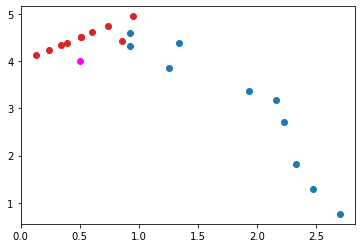

In [9]:
plt.scatter(*opt.y[:10].T)
plt.scatter(*opt.y[10:].T, c="C3")
plt.scatter(*opt.targets.T, c="magenta")


In [10]:
from testsuite.surrogates import RF
multi_surrogate = MultiSurrogate(RF)
opt = DirectedSaf(objective_function=objective_function, ei=False,  targets=[[0.5, 4.]], w=0.5, limits=limits, surrogate=multi_surrogate, n_initial=10, budget=budget, seed=seed)

In [11]:
opt.optimise()

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=111006, Sat Mar  6 14:59:51 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.614896794655453e-01 1.0e+00 2.50e-01  2e-01  3e-01 0:00.3
    2     16 -5.628114098850983e-01 1.2e+00 2.70e-01  3e-01  3e-01 0:00.5
    3     24 -5.628225489865180e-01 1.4e+00 2.62e-01  2e-01  3e-01 0:00.8
   15    120 -5.628215596831058e-01 2.4e+00 1.23e-01  7e-02  1e-01 0:03.8
   32    256 -5.643385943827091e-01 4.0e+00 6.69e-02  2e-02  8e-02 0:08.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564115, sigma=4.75e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=38)


   52    416 -5.652712047279043e-01 7.7e+00 2.56e-02  3e-03  2e-02 0:13.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565271, sigma=1.86e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=64)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565271, sigma=2.05e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=67)


   76    608 -5.657709160094256e-01 1.8e+01 1.51e-02  9e-04  1e-02 0:19.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565771, sigma=8.14e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=86)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565771, sigma=6.90e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=87)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565771, sigma=6.74e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   97    776 -5.657709160094256e-01 1.7e+01 5.60e-03  2e-04  3e-03 0:24.6


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565771, sigma=5.60e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=97)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.565771, sigma=5.60e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=97)


termination on tolfun=1e-11 (Sat Mar  6 15:00:15 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:00:15 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=5.60e-03 is large (Sat Mar  6 15:00:15 2021)
final/bestever f-value = -5.657709e-01 -5.657709e-01
incumbent solution: [0.31326056450605555, 3.718455217479518, 0.0017924666739339574, 7.426614456611505, 8.763108064596928]
std deviation: [0.00022580485081388795, 0.0023572618208613167, 0.0034400493979087027, 0.002336724471504025, 0.00042749808148046415]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=62193, Sat Mar  6 15:00:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.095996601982433e-01 1.0e+00 2.44e-01  2e-01  2e-01 0:00.3
    2     16 -4.922165813363392e-01 1.2e+00 2.56e-01  2e-01  3e-01 0:00.5
    3     24 -5.005919230234251e-01 1.5e+00 2.67e-01  2e-01  3e-01 0:00.8
   15    120 -5.611090131132500e-01 1.8e+00 3.80e-

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561541, sigma=3.26e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=136)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561541, sigma=2.91e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=140)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561541, sigma=2.43e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  154   1232 -5.615406514708786e-01 7.5e+01 3.64e-02  4e-04  2e-02 0:40.3
termination on tolfunhist=1e-12 (Sat Mar  6 15:00:56 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=3.64e-02 is large (Sat Mar  6 15:00:56 2021)
final/bestever f-value = -5.615407e-01 -5.615407e-01
incumbent solution: [0.3088487336294518, 2.9702746056535916, 2.878654653393476, 3.887340363072908, 7.063685545702745]
std deviation: [0.0004403450288886717, 0.02345684412572854, 0.0059584545528640395, 0.0036681977067991307, 0.001943275721020087]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=224400, Sat Mar  6 15:00:56 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.426229583379352e-01 1.0e+00 2.58e-01  3e-01  3e-01 0:00.3
    2     16 -5.504059473385584e-01 1.3e+00 2.76e-01  3e-01  3e-01 0:00.5
    3     24 -5.550753164745864e-01 1.3e+00 3.41e-01  3e-01  4e-01 0:00.8
   15    120 -5.566157954081286e-01 2.

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=3.06e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=69)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=2.59e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=73)


   75    600 -5.575388339527461e-01 1.5e+01 2.18e-02  3e-03  3e-02 0:19.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=2.18e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=75)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=1.77e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=76)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=1.76e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   85    680 -5.575388339527461e-01 1.8e+01 1.58e-02  2e-03  2e-02 0:21.8


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=1.58e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=85)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.557539, sigma=1.58e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=85)


termination on tolfun=1e-11 (Sat Mar  6 15:01:18 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:01:18 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.58e-02 is large (Sat Mar  6 15:01:18 2021)
final/bestever f-value = -5.575388e-01 -5.575388e-01
incumbent solution: [0.148501699484151, 2.8896557198097232, 2.3392936875899144, 0.8409564989134861, 7.9681415578004255]
std deviation: [0.003943895213940451, 0.0019897256440493754, 0.0022577178560484372, 0.019442152333813165, 0.001895084797422614]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=84974, Sat Mar  6 15:01:19 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.962148063430075e-01 1.0e+00 2.58e-01  2e-01  3e-01 0:00.3
    2     16 -4.859527718872731e-01 1.4e+00 2.31e-01  2e-01  2e-01 0:00.5
    3     24 -5.129594737285085e-01 1.4e+00 2.48e-01  2e-01  3e-01 0:00.8
   15    120 -5.501736953480366e-01 2.8e+00 1.12e+00  6e

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=6.49e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=66)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=5.44e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=68)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=5.63e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   75    600 -5.609614268804228e-01 5.1e+00 3.41e-02  4e-03  2e-02 0:19.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=3.41e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=75)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=3.03e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=76)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=3.45e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   83    664 -5.609614268804228e-01 5.5e+00 2.39e-02  3e-03  1e-02 0:21.2


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=2.39e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=83)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560961, sigma=2.39e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=83)


termination on tolfun=1e-11 (Sat Mar  6 15:01:40 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:01:40 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=2.39e-02 is large (Sat Mar  6 15:01:40 2021)
final/bestever f-value = -5.609614e-01 -5.609614e-01
incumbent solution: [0.007588662786946794, 2.8459345411753145, 1.9437811225173012, 4.144753499944787, 7.4245196084236085]
std deviation: [0.0049138296460858166, 0.00922256068437279, 0.006760306597254402, 0.011160939438743436, 0.0029993680648447213]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=123918, Sat Mar  6 15:01:40 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.844391837657011e-01 1.0e+00 2.33e-01  2e-01  2e-01 0:00.3
    2     16 -5.108242469712332e-01 1.3e+00 2.77e-01  2e-01  3e-01 0:00.5
    3     24 -5.166532272385329e-01 1.7e+00 3.22e-01  3e-01  4e-01 0:00.8
   15    120 -5.492671949001440e-01 2.6e+00 2.89e-01  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.553533, sigma=3.47e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=51)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.553533, sigma=3.18e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=52)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.553533, sigma=2.60e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   72    576 -5.535327379879535e-01 2.3e+01 2.18e-02  1e-03  2e-02 0:18.4
termination on tolfunhist=1e-12 (Sat Mar  6 15:01:59 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=2.18e-02 is large (Sat Mar  6 15:01:59 2021)
final/bestever f-value = -5.535327e-01 -5.537559e-01
incumbent solution: [0.0003998136033650953, 1.9782350932998753, 1.8940034403424943, 6.93047206232701, 4.084283921756783]
std deviation: [0.0014286633028434356, 0.005104442014557842, 0.013267858869792721, 0.02394012178685954, 0.005361535654821368]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=106104, Sat Mar  6 15:01:59 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.461386276571758e-01 1.0e+00 3.21e-01  3e-01  3e-01 0:00.3
    2     16 -5.563108022121033e-01 1.2e+00 3.58e-01  3e-01  4e-01 0:00.5
    3     24 -5.513063213918153e-01 1.3e+00 3.45e-01  3e-01  4e-01 0:00.8
   15    120 -5.601759841688587e-01 5

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=3.01e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=92)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=3.14e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=93)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.79e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

  100    800 -5.608695066215703e-01 9.2e+01 2.49e-02  2e-04  2e-02 0:25.4


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.63e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=102)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.52e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=108)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.54e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  110    880 -5.608695066215703e-01 9.0e+01 2.21e-02  2e-04  1e-02 0:28.0


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.21e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=110)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560870, sigma=2.21e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=110)


termination on tolfun=1e-11 (Sat Mar  6 15:02:27 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:02:27 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=2.21e-02 is large (Sat Mar  6 15:02:27 2021)
final/bestever f-value = -5.608695e-01 -5.608695e-01
incumbent solution: [0.000882750992214297, 1.9077963426289295, 0.934348412015598, 0.18209256272085594, 5.278803990163263]
std deviation: [0.00017787130266199022, 0.003627157093017745, 0.006791085322599791, 0.01279110614444909, 0.009680523341916509]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=162374, Sat Mar  6 15:02:27 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.140842039573807e-01 1.0e+00 2.36e-01  2e-01  2e-01 0:00.3
    2     16 -5.191622106865532e-01 1.3e+00 2.42e-01  2e-01  3e-01 0:00.6
    3     24 -5.378712758604802e-01 1.4e+00 2.70e-01  2e-01  3e-01 0:00.8
   16    128 -5.569111333486167e-01 1.9e+00 2.29e-01  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564804, sigma=1.93e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=132)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564836, sigma=6.13e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=149)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564836, sigma=5.14e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  163   1304 -5.648355808798788e-01 8.9e+02 7.53e-03  1e-05  8e-03 0:41.0


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564836, sigma=7.53e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=163)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.564836, sigma=7.53e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=163)


termination on tolfun=1e-11 (Sat Mar  6 15:03:09 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:03:09 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=7.53e-03 is large (Sat Mar  6 15:03:09 2021)
final/bestever f-value = -5.648356e-01 -5.648356e-01
incumbent solution: [0.0005846359385727591, 1.2375710095148897, 1.9808623664711973, 4.249758822915225, 9.56504408479861]
std deviation: [1.0602306482878252e-05, 0.002666846182044652, 0.0003065096002499939, 0.007780176647465014, 0.003253684118354382]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=150932, Sat Mar  6 15:03:09 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.230133746767767e-01 1.0e+00 2.28e-01  2e-01  2e-01 0:00.3
    2     16 -5.262269176082973e-01 1.2e+00 2.20e-01  2e-01  2e-01 0:00.5
    3     24 -5.350078442005666e-01 1.4e+00 2.71e-01  2e-01  3e-01 0:00.8
   15    120 -5.579644308636862e-01 4.6e+00 6.20e-01 

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561129, sigma=8.31e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=103)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561129, sigma=7.40e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=107)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561129, sigma=6.30e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  117    936 -5.611294690074493e-01 1.1e+02 6.57e-03  9e-05  6e-03 0:29.6


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561129, sigma=6.57e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=117)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561129, sigma=6.57e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=117)


termination on tolfun=1e-11 (Sat Mar  6 15:03:39 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:03:39 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=6.57e-03 is large (Sat Mar  6 15:03:39 2021)
final/bestever f-value = -5.611295e-01 -5.611295e-01
incumbent solution: [0.0005010492739959918, 3.995795697909274, 1.9804462488172878, 5.629702490500653, 5.030141540368882]
std deviation: [8.869076215149401e-05, 0.006204665615741008, 0.00012487285506446532, 0.005458441782346851, 0.0022194590467739216]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=159819, Sat Mar  6 15:03:39 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.429918425998429e-01 1.0e+00 2.13e-01  2e-01  2e-01 0:00.3
    2     16 -5.488962513145039e-01 1.3e+00 1.76e-01  1e-01  2e-01 0:00.5
    3     24 -5.464681506341056e-01 1.4e+00 1.58e-01  1e-01  2e-01 0:00.8
   16    128 -5.482463063203784e-01 5.6e+00 1.50e-01

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.552905, sigma=8.33e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=119)


  131   1048 -5.529046378131176e-01 3.1e+02 8.93e-03  6e-05  9e-03 0:33.2
  132   1056 -5.529046378131176e-01 3.2e+02 9.38e-03  7e-05  9e-03 0:33.5


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.552905, sigma=9.38e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=132)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.552905, sigma=9.38e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=132)


termination on tolfun=1e-11 (Sat Mar  6 15:04:13 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:04:13 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=9.38e-03 is large (Sat Mar  6 15:04:13 2021)
final/bestever f-value = -5.529046e-01 -5.529541e-01
incumbent solution: [2.7955380785681004e-06, 2.601671917699657, 1.9951017163965523, 6.404057090457119, 1.2770274715216818]
std deviation: [6.726506592085711e-05, 0.0013455861178594646, 0.000803080744544053, 0.009125566072467036, 0.006407934890477831]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=126159, Sat Mar  6 15:04:13 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.585460007505580e-01 1.0e+00 2.33e-01  2e-01  2e-01 0:00.3
    2     16 -4.782738213136331e-01 1.3e+00 2.35e-01  2e-01  2e-01 0:00.5
    3     24 -4.778020748302961e-01 1.4e+00 2.21e-01  2e-01  2e-01 0:00.8
   15    120 -5.448761159967295e-01 2.2e+00 3.88e-01

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560761, sigma=6.31e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=121)


  132   1056 -5.608038173303569e-01 1.0e+03 4.61e-03  3e-06  3e-03 0:33.4
  166   1328 -5.610791580833681e-01 7.9e+02 1.90e-03  1e-06  8e-04 0:42.5


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561079, sigma=2.02e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=175)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561079, sigma=1.46e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=185)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561079, sigma=1.43e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  189   1512 -5.610791580833681e-01 1.9e+03 1.69e-03  9e-07  9e-04 0:48.9
termination on tolfun=1e-11 (Sat Mar  6 15:05:02 2021)
termination on tolfunhist=1e-12 (Sat Mar  6 15:05:02 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.69e-03 is large (Sat Mar  6 15:05:02 2021)
final/bestever f-value = -5.610792e-01 -5.610792e-01
incumbent solution: [0.0005805892402518251, 2.8730490230827894, 1.9802528991529704, 4.142240527443485, 7.409889857843384]
std deviation: [9.016079348398245e-07, 0.0006199232970377851, 8.923138064193523e-06, 0.0009416149213406274, 0.0005665981974094629]


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561079, sigma=1.69e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=189)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561079, sigma=1.69e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=189)


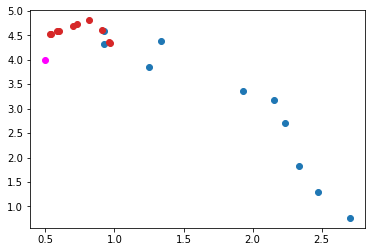

In [13]:
plt.scatter(*opt.y[:10].T)
plt.scatter(*opt.y[10:].T, c="C3")
plt.scatter(*opt.targets.T, c="magenta")